# Corona Virus in the US

In [1]:
#data wrangle
import pandas as pd
import numpy as np
import json

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Aquire - deaths by county

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 6 columns):
date      35698 non-null object
county    35698 non-null object
state     35698 non-null object
fips      35180 non-null float64
cases     35698 non-null int64
deaths    35698 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.6+ MB


In [4]:
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


### Prepare

In [5]:
df.isnull().sum()

date        0
county      0
state       0
fips      518
cases       0
deaths      0
dtype: int64

In [6]:
df [df.fips.isnull()]

,date,county,state,fips,cases,deaths
416,2020-03-01,New York City,New York,NaN,1,0
418,2020-03-01,Unknown,Rhode Island,NaN,2,0
448,2020-03-02,New York City,New York,NaN,1,0
450,2020-03-02,Unknown,Rhode Island,NaN,2,0
482,2020-03-03,New York City,New York,NaN,2,0
...,...,...,...,...,...,...
35246,2020-04-05,Unknown,Tennessee,NaN,81,0
35424,2020-04-05,Unknown,Utah,NaN,14,4
35438,2020-04-05,Unknown,Vermont,NaN,13,15
35442,2020-04-05,Unknown,Virgin Islands,NaN,42,0


In [7]:
df [df.fips.isnull()].county.value_counts()

Unknown          465
New York City     36
Kansas City       17
Name: county, dtype: int64

### Explore

In [8]:
states = df.groupby(df.state).sum()[["cases","deaths"]]

In [9]:
states["death_rate"] = round(states.deaths / states.cases * 100,2)

In [10]:
states.index.name = "state"

In [11]:
states.sort_values("death_rate", ascending=False)

,cases,deaths,death_rate
state,,,
Northern Mariana Islands,46,5,10.87
Washington,77513,3855,4.97
Vermont,4021,184,4.58
Puerto Rico,2902,111,3.82
Louisiana,80293,2987,3.72
Oklahoma,8068,290,3.59
Kentucky,7627,256,3.36
Michigan,101814,3357,3.30
Georgia,51443,1657,3.22


> The death rate is misleading, as it's based on the number of cases confirmed. This is a problem since there is insufficient testing nationwide, and it is very uncertain how many cases there actually is. 

#### Add population data

State population data obtained from https://worldpopulationreview.com/states/

In [12]:
with open('data.json') as f:
    pop = json.load(f)

In [13]:
pop.keys()

dict_keys(['data'])

In [14]:
pop = pd.DataFrame(pop['data'])

In [15]:
df_state = pd.merge(states,pop, left_on="state", right_on="State")

In [16]:
df_state.head()

,cases,deaths,death_rate,rank,State,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,13516,229,1.69,24,Alabama,4908621,0.0042,4887871,4785448,0.0257,0.0147,96.9221
1,1652,25,1.51,49,Alaska,734002,-0.0047,737438,713906,0.0281,0.0022,1.2863
2,15935,296,1.86,14,Arizona,7378494,0.0288,7171646,6407774,0.1515,0.0221,64.9550
3,8123,119,1.46,33,Arkansas,3038999,0.0084,3013825,2921978,0.0400,0.0091,58.4030
4,118171,2521,2.13,1,California,39937489,0.0096,39557045,37320903,0.0701,0.1194,256.3727


> Retaining only the "Pop" column, as it's reflective of 2020. 

In [17]:
df_state = df_state[["cases","deaths","death_rate","State","Pop"]]
df_state.columns = [x.lower() for x in df_state.columns]

In [18]:
df_state = df_state.set_index("state")

In [19]:
df_state.head()

,cases,deaths,death_rate,pop
state,,,,
Alabama,13516,229,1.69,4908621
Alaska,1652,25,1.51,734002
Arizona,15935,296,1.86,7378494
Arkansas,8123,119,1.46,3038999
California,118171,2521,2.13,39937489


In [20]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Alabama to Wyoming
Data columns (total 4 columns):
cases         52 non-null int64
deaths        52 non-null int64
death_rate    52 non-null float64
pop           52 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.0+ KB


Let's check out the rates by 1,0000 people. 

In [21]:
df_state["cases_p_1000"] = round(df_state.cases / df_state["pop"] * 1000, 2)
df_state["deaths_p_1000"] = round(df_state.deaths / df_state["pop"] * 1000, 2)

In [22]:
df_state.sort_values("cases_p_1000", ascending=False).head()

,cases,deaths,death_rate,pop,cases_p_1000,deaths_p_1000
state,,,,,,
New York,981105,20331,2.07,19440469,50.47,1.05
New Jersey,241903,4526,1.87,8936574,27.07,0.51
Louisiana,80293,2987,3.72,4645184,17.29,0.64
Massachusetts,85868,1256,1.46,6976597,12.31,0.18
Connecticut,37853,966,2.55,3563077,10.62,0.27


In [23]:
df_state.sort_values("deaths_p_1000", ascending=False).head()

,cases,deaths,death_rate,pop,cases_p_1000,deaths_p_1000
state,,,,,,
New York,981105,20331,2.07,19440469,50.47,1.05
Louisiana,80293,2987,3.72,4645184,17.29,0.64
New Jersey,241903,4526,1.87,8936574,27.07,0.51
Washington,77513,3855,4.97,7797095,9.94,0.49
Michigan,101814,3357,3.30,10045029,10.14,0.33


> The `deaths_p_1000` is probably the number that is most reflective of the damage the virus is causing within a state. As all states have insufficient testing and it is truly unknown how much the virus has spread.  

### Texas Counties

In [24]:
df_texas = df [df.state == "Texas"]

In [25]:
df_texas.head()

,date,county,state,fips,cases,deaths
143,2020-02-12,Bexar,Texas,48029.0,1,0
154,2020-02-13,Bexar,Texas,48029.0,2,0
165,2020-02-14,Bexar,Texas,48029.0,2,0
176,2020-02-15,Bexar,Texas,48029.0,2,0
187,2020-02-16,Bexar,Texas,48029.0,2,0


In [26]:
df_texas.county.value_counts()

Bexar         54
Fort Bend     33
Harris        32
Collin        28
Dallas        27
              ..
Tyler          2
Hutchinson     2
Mason          2
Trinity        2
Hemphill       2
Name: county, Length: 155, dtype: int64

In [27]:
df_texas.date = pd.to_datetime(df_texas.date)
df_texas = df_texas.set_index("date")
df_texas = df_texas[["county","cases","deaths"]]

In [28]:
top_cases = df_texas.groupby("county").max().sort_values("cases",ascending=False).head(10).index

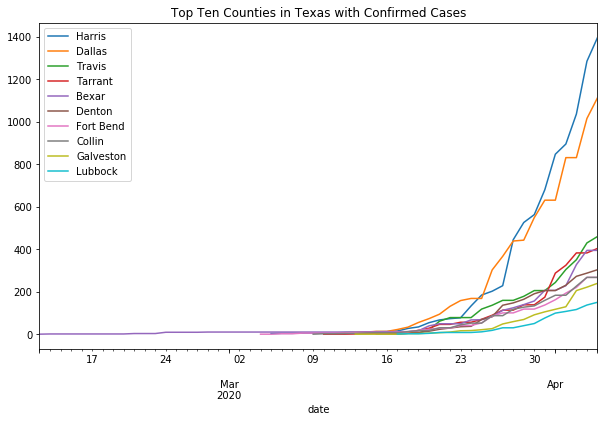

In [30]:
plt.figure(figsize=(10,6))

for x in top_cases:
    df_texas [df_texas.county == x]["cases"].plot()
plt.legend(labels=top_cases)
plt.title("Top Ten Counties in Texas with Confirmed Cases")
plt.show()